In [14]:
from google.colab import auth
import pandas as pd
import gspread
from google.auth import default
import numpy as np 
from collections import Counter
import seaborn as sns 
import pandas_gbq 

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('Malaysian Pay Gap: Data Submission (Responses) - Public').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
# print(rows)

# Convert to a DataFrame and render.

df = pd.DataFrame.from_records(rows)

# Cleaning data and columns
cols = rows[0]
df.columns = cols
df = df.iloc[1:,:]

# Transform column names as there are duplicated column names and spaces
col_list = []

for x in df.columns:
  if x not in col_list:
    col_list.append(x)
  else:
    col_list.append(x + '_others')

df.columns = col_list
df.columns = [x.lower().replace(" ", '_').replace('#', 'no') for x in df.columns]

# Change data types
for x in df.columns.tolist()[1:]:
  try:
    df[x] = pd.to_numeric(df[x])
  except:
    continue

df['timestamp'] = pd.to_datetime(df['timestamp'], 'coerce')

# Replace null values
df = df.replace("", np.nan)
df = df.replace(" ", np.nan)
display(df.head())
print(df.shape)

,timestamp,age,race,gender,nationality,qualification,job_position,exp,no_jobs,malaysia,...,industry_others,specialisation,specialisation_others,work_hours,work_days,current_salary,first_job_salary,compensation_satisfaction,overall_satisfaction,comments
1,2022-03-12 19:48:40,37.0,Chinese,Female,Malaysia,Master's Degree (Overseas),Associate,12.0,4,Yes,...,NaN,Architect,NaN,10.0,5.0,18000.0,4500.0,4,4,Have confidence and do not undercut your own s...
2,2022-03-12 19:30:38,28.0,Malay,Female,Malaysia,Bachelor's Degree,Executive Customer Experience,5.0,2,Yes,...,NaN,Customer Service,NaN,8.0,5.0,3500.0,2400.0,4,3,NaN
3,2022-03-12 19:21:08,30.0,Malay,Male,Malaysia,Bachelor's Degree,Fund Accounting Analyst ll,5.0,5,Yes,...,NaN,Accounting,NaN,9.0,5.0,6575.0,3400.0,3,3,NaN
4,2022-03-12 19:18:06,33.0,Malay,Male,Malaysia,Bachelor's Degree,Mill engineer,9.0,2,Yes,...,NaN,Engineering,NaN,10.0,6.0,4500.0,2600.0,2,3,NaN
5,2022-03-12 19:10:28,27.0,Malay,Female,Malaysia,Bachelor's Degree,Site Quantity Surveyor,2.5,5,Yes,...,NaN,Quantity Survey,NaN,8.0,6.0,3000.0,2000.0,2,4,NaN


(2825, 24)


In [54]:
# df.to_csv('test.csv', index=False, encoding='utf-8-sig')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 1 to 2825
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  2825 non-null   datetime64[ns]
 1   age                        2808 non-null   float64       
 2   race                       2825 non-null   object        
 3   gender                     2825 non-null   object        
 4   nationality                2825 non-null   object        
 5   qualification              2825 non-null   object        
 6   job_position               2825 non-null   object        
 7   exp                        2825 non-null   float64       
 8   no_jobs                    2825 non-null   int64         
 9   malaysia                   2825 non-null   object        
 10  remote                     2825 non-null   object        
 11  state                      2825 non-null   object        
 12  type_o

In [17]:
#Project ID
project_id = 'datasets-341415'
#Schema
dataset = 'datasets'
#Table
table_name = 'salaries'


pandas_gbq.to_gbq(df, destination_table=f"{dataset}.{table_name}", project_id=f"{project_id}", if_exists='replace')

1it [00:03,  3.33s/it]


In [18]:
df.race.value_counts()

Chinese                                                                                           1531
Malay                                                                                              994
Indian                                                                                             163
Sabahan Ethnic                                                                                      39
Sarawakian Ethnic                                                                                   38
Punjabi                                                                                             12
Eurasian                                                                                            10
Chindian                                                                                             3
Indonesian                                                                                           3
Caucasian                                                                

In [85]:
df.Industry.value_counts()

Technology/IT/Data                                 328
Financial services/Investment/Banking/Insurance    320
Other                                              310
Manufacturing                                      230
E-commerce & Retail                                155
Healthcare/Health services                         152
Construction                                       149
Finance                                            124
Consulting                                         106
Oil & Gas Production/Refining                      103
Education                                          102
Media & Entertainment                               79
Telecommunication Services                          64
FMCG                                                61
Food & Beverage                                     60
Legal                                               54
Mechanical and Electrical engineering               47
Hardware & Semiconductor                            46
Supply Cha

In [87]:
Counter(df.Industry_others).most_common(10)

[(nan, 2431),
 ('Advertising', 17),
 ('Pharmaceutical', 9),
 ('Audit', 6),
 ('Real Estate', 5),
 ('Architecture', 5),
 ('Property', 4),
 ('Professional Services', 4),
 ('Marketing', 3),
 ('FinTech', 3)]

In [82]:
df.Specialisation.value_counts()

Other                                                 648
Engineering                                           289
IT - Software                                         211
Accounting                                            186
Marketing                                             170
Sales                                                 140
Consulting                                            132
Project Management                                    119
Audit/Taxation                                         98
Customer Service                                       96
Business Development                                   83
Human Resources                                        83
Creative - Art direction/visual design/copywriting     62
Admin                                                  61
Purchasing & Procurement                               57
Design                                                 56
IT - Network/DB/Sys                                    52
Architect     

In [84]:
Counter(df.Specialisation_others).most_common(10)

[(nan, 2143),
 ('Legal', 15),
 ('Teaching', 13),
 ('Operations', 9),
 ('Finance', 9),
 ('Risk Management', 8),
 ('Operation', 8),
 ('Analyst', 7),
 ('Lawyer', 7),
 ('Research', 6)]

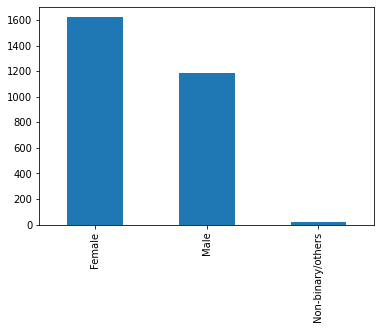

In [20]:
df.gender.value_counts().plot.bar()

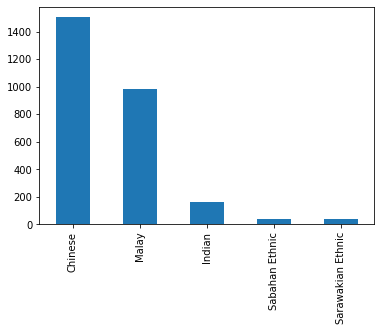

In [77]:
df.Race.value_counts()[:5].plot.bar()

In [91]:
df.loc[df.Age > 50]

,Timestamp,Age,Race,Gender,Nationality,Qualification,Job Position,Exp,# Jobs,Malaysia,...,Industry_others,Specialisation,Specialisation_others,Work hours,Work days,Current Salary,First Job Salary,Compensation Satisfaction,Overall Satisfaction,Comments
318,2022-03-11 08:33:02,60.0,Malay,Male,Malaysia,Bachelor's Degree (Overseas),"Head/Senior Manager, Well Engineering Department",35.0,7,Yes,...,NaN,Consulting,NaN,8.0,4.5,102000.0,600.0,4,4,This is not my highest earning in my career. D...
381,2022-03-11 02:38:25,55.0,Chinese,Female,Malaysia,High School,Accounts Executive,36.0,1,Yes,...,Books Binding Company,Accounting,NaN,8.0,6.0,5000.0,1000.0,3,3,NaN
446,2022-03-11 00:29:14,52.0,Chinese,Female,Malaysia,Diploma,Products Compliance Specialist,12.0,6,Yes,...,NaN,Other,Corporate Social Responsibility,10.0,5.0,5000.0,280.0,1,1,"If the boss’ boss doesn’t like you, your rice ..."
1734,2022-03-10 15:43:40,51.0,Malay,Male,Malaysia,Diploma/Professional Certifications,Finance analyst,24.0,9,Yes,...,NaN,Accounting,NaN,9.0,5.0,7800.0,1200.0,3,3,A contract job at 51 years old is very risky. ...
2261,2022-03-10 13:52:13,54.0,Chinese,Male,Malaysia,Diploma/Professional Certifications,Finance Manager,33.0,8,Yes,...,NaN,Accounting,NaN,8.0,5.0,20395.0,200.0,5,5,"To all the youngsters out there, never give up..."
